Niilo Pääkkönen
K431448

Problem Pre1:

In [2]:
import numpy as np
from scipy.spatial.distance import cdist

In [215]:
dims = [2, 3, 5, 7, 10, 13, 17]
n=10000000

for d in dims:
    data = 2*np.random.random_sample((n, d))-1
    origin = np.zeros((1,d), dtype=int)
    print(data.shape)
    
    dist = cdist(data, origin)
    hs = (dist < 1).sum()/n*100
    hss = ((dist < 1)&(dist > 0.95)).sum()/n*100
    print(hs,"% points in hypersphere")
    print(hss,"% points in hyperspherical shell","\n")

(10000000, 2)
78.52101 % points in hypersphere
7.653709999999999 % points in hyperspherical shell 

(10000000, 3)
52.346970000000006 % points in hypersphere
7.47512 % points in hyperspherical shell 

(10000000, 5)
16.442 % points in hypersphere
3.7200900000000003 % points in hyperspherical shell 

(10000000, 7)
3.69851 % points in hypersphere
1.11664 % points in hyperspherical shell 

(10000000, 10)
0.24872000000000002 % points in hypersphere
0.10081000000000001 % points in hyperspherical shell 

(10000000, 13)
0.011510000000000001 % points in hypersphere
0.0056 % points in hyperspherical shell 

(10000000, 17)
3.9999999999999996e-05 % points in hypersphere
3.9999999999999996e-05 % points in hyperspherical shell 



Problem Pre2

MSE for dim = 1  is  0.003226879035131801
MSE for dim = 2  is  0.07512150329111844
MSE for dim = 4  is  0.40533648615878787
MSE for dim = 7  is  0.727125422954138
MSE for dim = 10  is  0.7676000171087906
MSE for dim = 15  is  0.8859598878625465


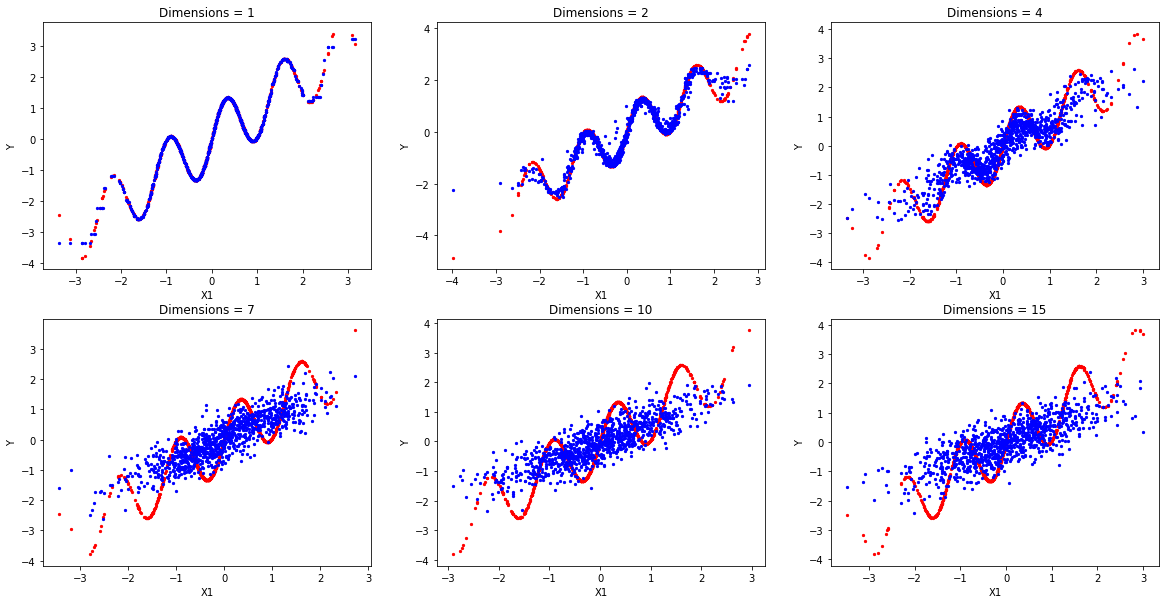

In [214]:
dims = [1,2,4,7,10,15]
n=2000
i = 0

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
axs = axs.ravel()

for d in dims:    
    X = np.random.normal(0,1, (n, d))
    result = [test_X, test_Y, pred_Y] = train_test_pred(X)
    
    axs[i].scatter(result[0], result[1],5,"r")
    axs[i].scatter(result[0], result[2],5,"b")
    axs[i].set_title("Dimensions = "+ str(d))
    axs[i].set_xlabel('X1')
    axs[i].set_ylabel('Y')
    i += 1
    
    MSE = np.square(test_Y-pred_Y).mean()
    print("MSE for dim =",d, " is ",MSE)

In [167]:
def train_test_pred (X):
    Y = X[:,0] + np.sin(5*X[:,0])

    train_X = X[:1000, :]
    test_X = X[1000:, :]

    train_Y = Y[:1000]
    test_Y = Y[1000:]
    
    from sklearn.neighbors import KNeighborsRegressor

    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(train_X, train_Y)

    pred_Y = knn.predict(test_X)
    
    return test_X[:,0], test_Y, pred_Y